In [169]:
import pandas as pd 
import numpy as np
import re
import seaborn as sns
import statsmodels as sm
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import json
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
import plotly.express as px
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [170]:

movies=pd.read_csv('tmdb_5000_movies.csv',encoding='latin-1')
credits=pd.read_csv('tmdb_5000_credits.csv',encoding='latin-1')

In [171]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,7,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bondâs past sends him...,107,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,8,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",44,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6,2124


In [172]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [173]:
print("Nombre of Rows :", movies.shape[0])
print("Nombre of Columns :", movies.shape[1])

Nombre of Rows : 4803
Nombre of Columns : 20


In [174]:
print("Nombre of Rows :", credits.shape[0])
print("Nombre of Columns :", credits.shape[1])

Nombre of Rows : 4803
Nombre of Columns : 4


information about data

In [175]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [176]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [177]:
print("Any Missing Values ?", credits.isna().values.any())

Any Missing Values ? False


In [178]:
print("Are there any duplicated values ? ", credits.duplicated().any())

Are there any duplicated values ?  False


In [179]:
print("Are there any duplicated values ? ", movies.duplicated().any())

Are there any duplicated values ?  False


In [180]:
print("Any Missing Values ?", movies.isna().values.any())

Any Missing Values ? True


In [181]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [182]:
# Fill missing values in numerical columns with median
movies['runtime'].fillna(movies['runtime'].median(), inplace=True)

# Fill missing values in categorical columns with mode
movies['tagline'].fillna(movies['tagline'].mode()[0], inplace=True)

# Fill missing values in text data with 'Not available'
movies['overview'].fillna('Not available', inplace=True)


# Verify if there are any missing values left
print(movies.isnull().sum())

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
dtype: int64


In [183]:
# Drop the 'homepage' column
movies.drop(columns=['homepage'], inplace=True)

# Verify the changes
print(movies.head())  

      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates

In [184]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,7,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bondâs past sends him...,107,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,8,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",44,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6,2124


In [185]:
movies = movies.merge(credits,on="title")
movies.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,7,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bondâs past sends him...,107,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [186]:
# Find the rows where 'release_date' is null
movies_with_null_release_date = movies[movies['release_date'] == 'null']

# Print the names of movies with null release dates
print("Movies with null release date:")
for index, row in movies_with_null_release_date.iterrows():
    print(row['title'])


Movies with null release date:


In [187]:
# Drop rows where 'release_date' is null
movies['release_date'] = movies['release_date'].replace('null', np.nan)
movies = movies.dropna(subset=['release_date'])

In [188]:
import ast
movies_df2 = movies
movies_df2['genre_list'] = movies['genres'].map(ast.literal_eval)
movies_df2['company_list'] = movies['production_companies'].map(ast.literal_eval)
movies_df2['countries_list'] = movies['production_countries'].map(ast.literal_eval)
movies_df2['keyword_list'] = movies['keywords'].map(ast.literal_eval)
movies_df2['release_date'] = pd.to_datetime(movies_df2['release_date'])

movies_df2 = movies_df2.drop(columns=['keywords', 'genres','original_language', 'original_title', 'overview', 'spoken_languages', 'status', 'tagline', 'production_countries', 'production_companies'])
movies_df2.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,movie_id,cast,crew,genre_list,company_list,countries_list,keyword_list
0,237000000,19995,150,2009-12-10,2787965087,162,Avatar,7,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':..."
1,300000000,285,139,2007-05-19,961000000,169,Pirates of the Caribbean: At World's End,7,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na..."
2,245000000,206647,107,2015-10-26,880674609,148,Spectre,6,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name..."
3,250000000,49026,112,2012-07-16,1084939099,165,The Dark Knight Rises,8,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,..."
4,260000000,49529,44,2012-03-07,284139100,132,John Carter,6,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':..."


In [189]:
movies_df2['Year_of_Release'] = movies_df2['release_date'].dt.year
movies_df2['Month_of_Release'] = movies_df2['release_date'].dt.month
movies_df2.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,movie_id,cast,crew,genre_list,company_list,countries_list,keyword_list,Year_of_Release,Month_of_Release
0,237000000,19995,150,2009-12-10,2787965087,162,Avatar,7,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",2009,12
1,300000000,285,139,2007-05-19,961000000,169,Pirates of the Caribbean: At World's End,7,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",2007,5
2,245000000,206647,107,2015-10-26,880674609,148,Spectre,6,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",2015,10
3,250000000,49026,112,2012-07-16,1084939099,165,The Dark Knight Rises,8,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",2012,7
4,260000000,49529,44,2012-03-07,284139100,132,John Carter,6,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2012,3


In [190]:
print("Any Missing Values ?", movies.isna().values.any())

Any Missing Values ? False


<Axes: >

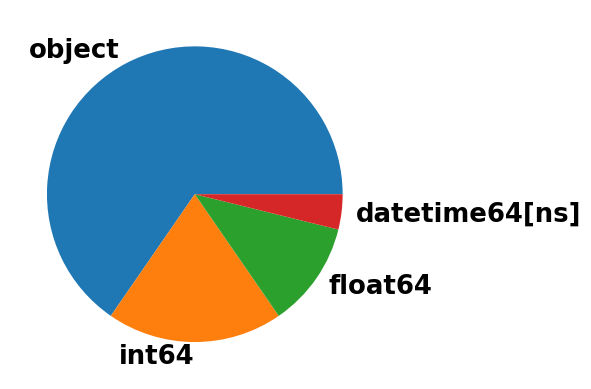

In [191]:
movies.dtypes.value_counts().plot.pie()

<Axes: >

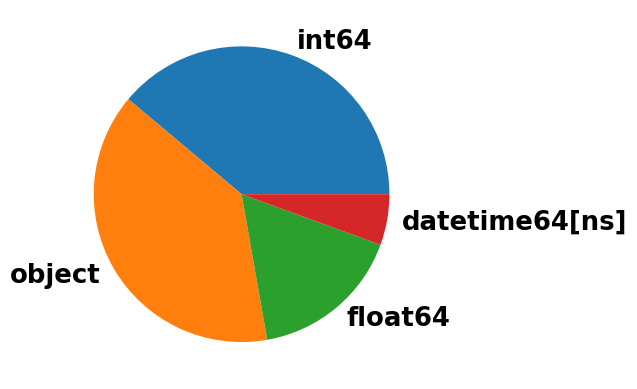

In [192]:
movies_df2.dtypes.value_counts().plot.pie()

<Axes: >

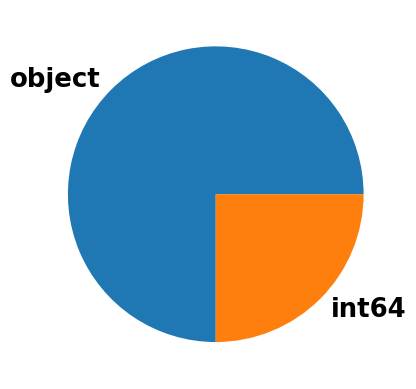

In [193]:
credits.dtypes.value_counts().plot.pie()

In [194]:
# to avoid this format "9.990000e+02" 
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [195]:
movies_df2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id,Year_of_Release,Month_of_Release
count,4808,4808,4808,4808,4808,4808,4808,4808,4808,4808
mean,29033840,57053,21,82292224,107,6,690,57053,2002,7
std,40706812,88540,32,162850467,23,1,1234,88540,12,3
min,0,5,0,0,0,0,0,5,1916,1
25%,795000,9011,5,0,94,6,54,9011,1999,4
50%,15000000,14624,13,19174985,103,6,236,14624,2005,7
75%,40000000,58579,28,92915179,118,7,737,58579,2011,10
max,380000000,459488,876,2787965087,338,10,13752,459488,2017,12


In [196]:
movies_df2.describe(include='all')

C:\Users\21276\AppData\Local\Temp\ipykernel_39076\2739251866.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,movie_id,cast,crew,genre_list,company_list,countries_list,keyword_list,Year_of_Release,Month_of_Release
count,4808,4808,4808,4808,4808,4808,4808,4808,4808,4808,4808,4808,4808,4808,4808,4808,4808,4808
unique,NaN,NaN,NaN,3280,NaN,NaN,4799,NaN,NaN,NaN,4761,4776,1175,3697,469,4222,NaN,NaN
top,NaN,NaN,NaN,2006-01-01 00:00:00,NaN,NaN,Out of the Blue,NaN,NaN,NaN,[],[],"[{'id': 18, 'name': 'Drama'}]",[],"[{'iso_3166_1': 'US', 'name': 'United States o...",[],NaN,NaN
freq,NaN,NaN,NaN,10,NaN,NaN,4,NaN,NaN,NaN,42,27,372,351,2979,411,NaN,NaN
first,NaN,NaN,NaN,1916-09-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-02-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,29033840,57053,21,NaN,82292224,107,NaN,6,690,57053,NaN,NaN,NaN,NaN,NaN,NaN,2002,7
std,40706812,88540,32,NaN,162850467,23,NaN,1,1234,88540,NaN,NaN,NaN,NaN,NaN,NaN,12,3
min,0,5,0,NaN,0,0,NaN,0,0,5,NaN,NaN,NaN,NaN,NaN,NaN,1916,1
25%,795000,9011,5,NaN,0,94,NaN,6,54,9011,NaN,NaN,NaN,NaN,NaN,NaN,1999,4


In [197]:
credits.describe(include='all')

,movie_id,title,cast,crew
count,4803,4803,4803,4803
unique,NaN,4800,4761,4776
top,NaN,The Host,[],[]
freq,NaN,2,43,28
mean,57165,NaN,NaN,NaN
std,88695,NaN,NaN,NaN
min,5,NaN,NaN,NaN
25%,9014,NaN,NaN,NaN
50%,14629,NaN,NaN,NaN
75%,58610,NaN,NaN,NaN


# visualization

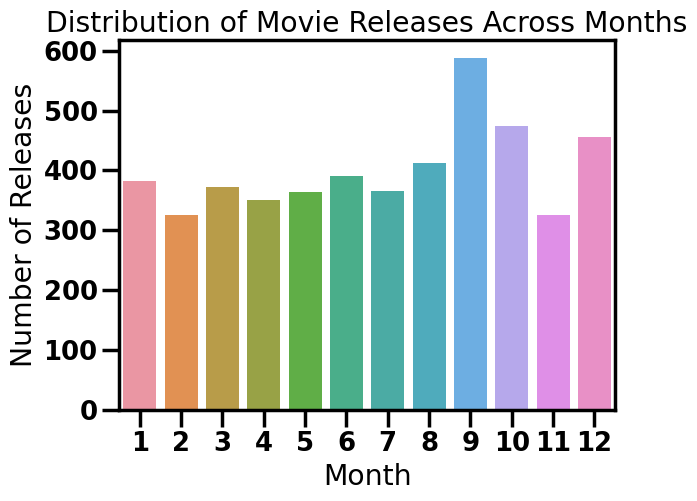

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming movies_df2 is your DataFrame containing movie data
month_stats = pd.DataFrame(movies_df2['Month_of_Release'].value_counts()).sort_index().reset_index()

# Plotting the distribution of movie releases across months
sns.barplot(data=month_stats, x=month_stats['index'], y=month_stats['Month_of_Release'])
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Distribution of Movie Releases Across Months')
plt.show()


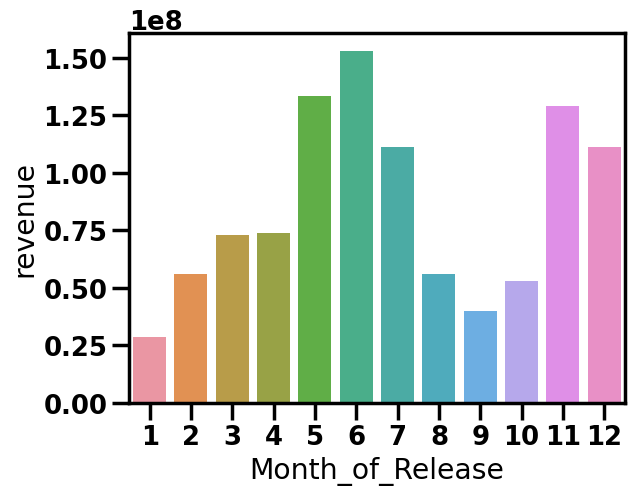

In [199]:
revenue_by_month = pd.DataFrame(movies_df2['revenue'].groupby(movies_df2['Month_of_Release']).mean()).sort_index().reset_index()
revenue_by_month.head()
sns.barplot(data = month_stats, x = revenue_by_month['Month_of_Release'], y = revenue_by_month['revenue'])
plt.show()

In [200]:
year_stats = pd.DataFrame(movies_df2['Year_of_Release'].value_counts()).sort_index().reset_index()
print("Last Year: " + str(year_stats['Year_of_Release'].max()))
print("First Year: " + str(year_stats['Year_of_Release'].min()))

Last Year: 247
First Year: 1


In [201]:
# Classer l'année de sortie comme avant 2000 ou l'année 2000 et après
movies_df2['Century_of_Release'] = 'Post-2000'  # Par défaut, définir toutes les valeurs sur 'Post-2000'
movies_df2.loc[movies_df2['Year_of_Release'] < 2000.0, 'Century_of_Release'] = 'Pre-2000'  # Remplacer les valeurs avant 2000

movies_df2.head()


,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,movie_id,cast,crew,genre_list,company_list,countries_list,keyword_list,Year_of_Release,Month_of_Release,Century_of_Release
0,237000000,19995,150,2009-12-10,2787965087,162,Avatar,7,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",2009,12,Post-2000
1,300000000,285,139,2007-05-19,961000000,169,Pirates of the Caribbean: At World's End,7,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",2007,5,Post-2000
2,245000000,206647,107,2015-10-26,880674609,148,Spectre,6,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",2015,10,Post-2000
3,250000000,49026,112,2012-07-16,1084939099,165,The Dark Knight Rises,8,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",2012,7,Post-2000
4,260000000,49529,44,2012-03-07,284139100,132,John Carter,6,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2012,3,Post-2000


In [202]:
genres = {
    18 : 'Drama', 35 : 'Comedy', 28 : 'Action', 12 : 'Adventure',
    27 : 'Horror', 80 : 'Crime', 53 : 'Thriller', 16 : 'Animation',
    14 : 'Fantasy', 10749 : 'Romance', 878 : 'Science Fiction', 99 : 'Documentary',
    10751 : 'Family', 9648 : 'Mystery', 10402 : 'Music', 37 : 'Western',
    36 : 'History', 10752 : 'War', 10770 : 'TV Movie', 10769 : 'Foreign'
}

genre_ids = list(genres.keys())
genre_names = list(genres.values())

## Get IDs of Movies depending on Genre
def get_genre(name):
    id_test = []
    for i in range(len(movies_df2['genre_list'])):
        for genre_dict in movies_df2['genre_list'].iloc[i]:
            if genre_dict['name'] == name:
                id_test.append(movies_df2['id'].iloc[i])
                break  # Sortir de la boucle dès que le genre est trouvé
    return id_test


# name = genres[10769]
# movie_ids = get_genre(name)
# print(len(movie_ids))
# print(genre_ids)
# print(genre_names)

In [203]:
genre_totals = {}
for i in range(len(genre_names)):
    name = genre_names[i]
    id_list = get_genre(name)
    count = len(id_list)
    genre_totals[name] = count

In [204]:
genre_counts_df = pd.DataFrame.from_dict(genre_totals, orient='index', columns=['count'])
genre_counts_df = genre_counts_df.sort_values(by='count', ascending=False)
genre_counts_df

,count
Drama,2300
Comedy,1723
Thriller,1275
Action,1156
Romance,895
Adventure,792
Crime,697
Science Fiction,538
Horror,520
Family,514


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Thriller'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Romance'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Science Fiction'),
  Text(8, 0, 'Horror'),
  Text(9, 0, 'Family'),
  Text(10, 0, 'Fantasy'),
  Text(11, 0, 'Mystery'),
  Text(12, 0, 'Animation'),
  Text(13, 0, 'History'),
  Text(14, 0, 'Music'),
  Text(15, 0, 'War'),
  Text(16, 0, 'Documentary'),
  Text(17, 0, 'Western'),
  Text(18, 0, 'Foreign'),
  Text(19, 0, 'TV Movie')])

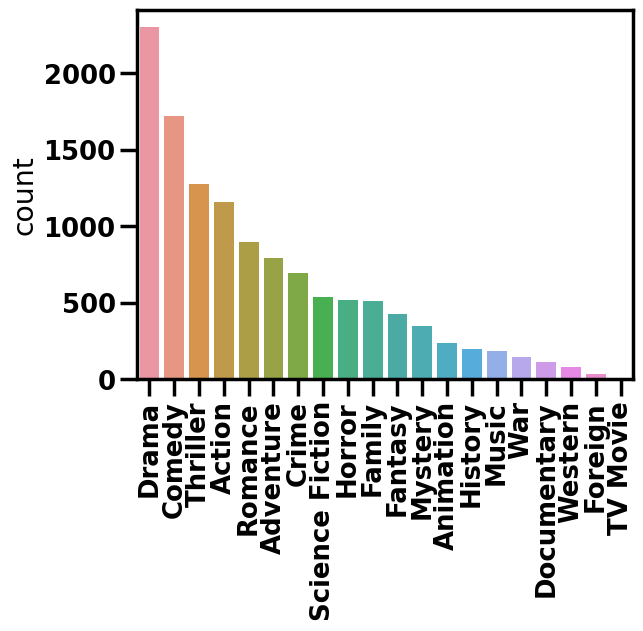

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data = genre_counts_df, x = genre_counts_df.index, y = genre_counts_df['count'])
plt.xticks(rotation=90)

In [206]:
def sort_ratings(df):
    rating_list = []
    for index, row in df.iterrows():
        vote_average = row['vote_average']
        if 0.0 <= vote_average < 1.0:
            rating_list.append('0-1')
        elif 1.0 <= vote_average < 2.0:
            rating_list.append('1-2')
        elif 2.0 <= vote_average < 3.0:
            rating_list.append('2-3')
        elif 3.0 <= vote_average < 4.0:
            rating_list.append('3-4')
        elif 4.0 <= vote_average < 5.0:
            rating_list.append('4-5')
        elif 5.0 <= vote_average < 6.0:
            rating_list.append('5-6')
        elif 6.0 <= vote_average < 7.0:
            rating_list.append('6-7')
        elif 7.0 <= vote_average < 8.0:
            rating_list.append('7-8')
        elif 8.0 <= vote_average < 9.0:
            rating_list.append('8-9')
        elif 9.0 <= vote_average <= 10.0:
            rating_list.append('9-10')
        else:
            rating_list.append('Unknown')  # Gérer les valeurs en dehors des plages spécifiées
    return rating_list
    
sorted_ratings = sort_ratings(movies_df2)
rating_df = pd.DataFrame(sorted_ratings, columns=['range'])
movies_df2['rating_range'] = rating_df


In [207]:
movies_df2.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,movie_id,cast,crew,genre_list,company_list,countries_list,keyword_list,Year_of_Release,Month_of_Release,Century_of_Release,rating_range
0,237000000,19995,150,2009-12-10,2787965087,162,Avatar,7,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",2009,12,Post-2000,7-8
1,300000000,285,139,2007-05-19,961000000,169,Pirates of the Caribbean: At World's End,7,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",2007,5,Post-2000,6-7
2,245000000,206647,107,2015-10-26,880674609,148,Spectre,6,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",2015,10,Post-2000,6-7
3,250000000,49026,112,2012-07-16,1084939099,165,The Dark Knight Rises,8,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",2012,7,Post-2000,7-8
4,260000000,49529,44,2012-03-07,284139100,132,John Carter,6,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2012,3,Post-2000,6-7


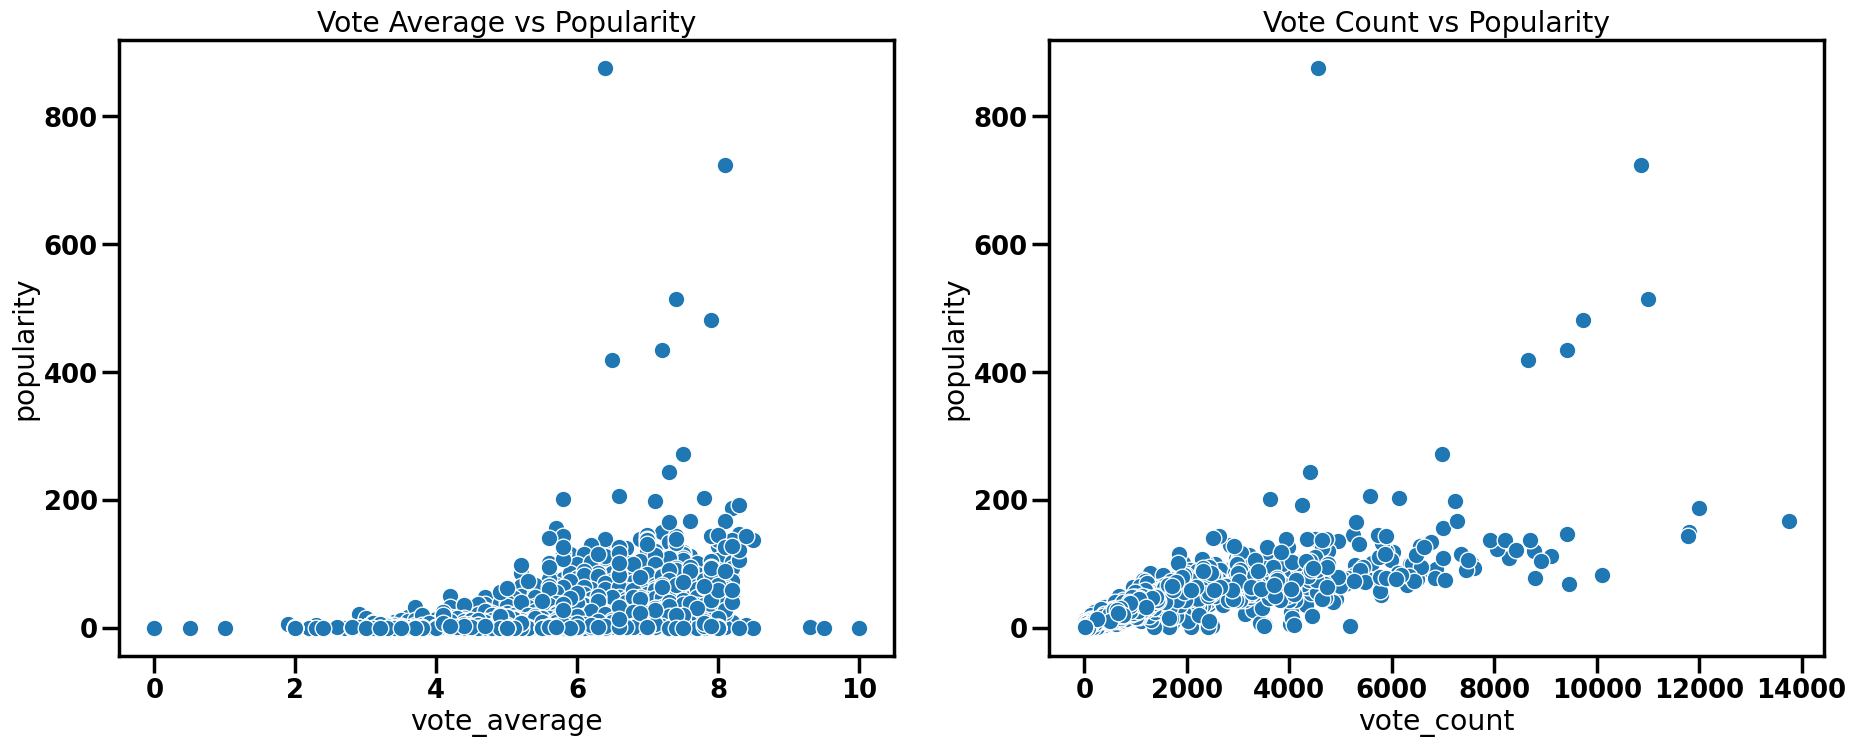

In [208]:
fig, ax = plt.subplots(1,2,figsize=(22,8))
sns.scatterplot(data=movies_df2, x=movies_df2['vote_average'], y=movies_df2['popularity'], ax=ax[0])
sns.scatterplot(data=movies_df2, x=movies_df2['vote_count'], y=movies_df2['popularity'], ax=ax[1])

ax[0].set_title('Vote Average vs Popularity')
ax[1].set_title('Vote Count vs Popularity')

plt.show()

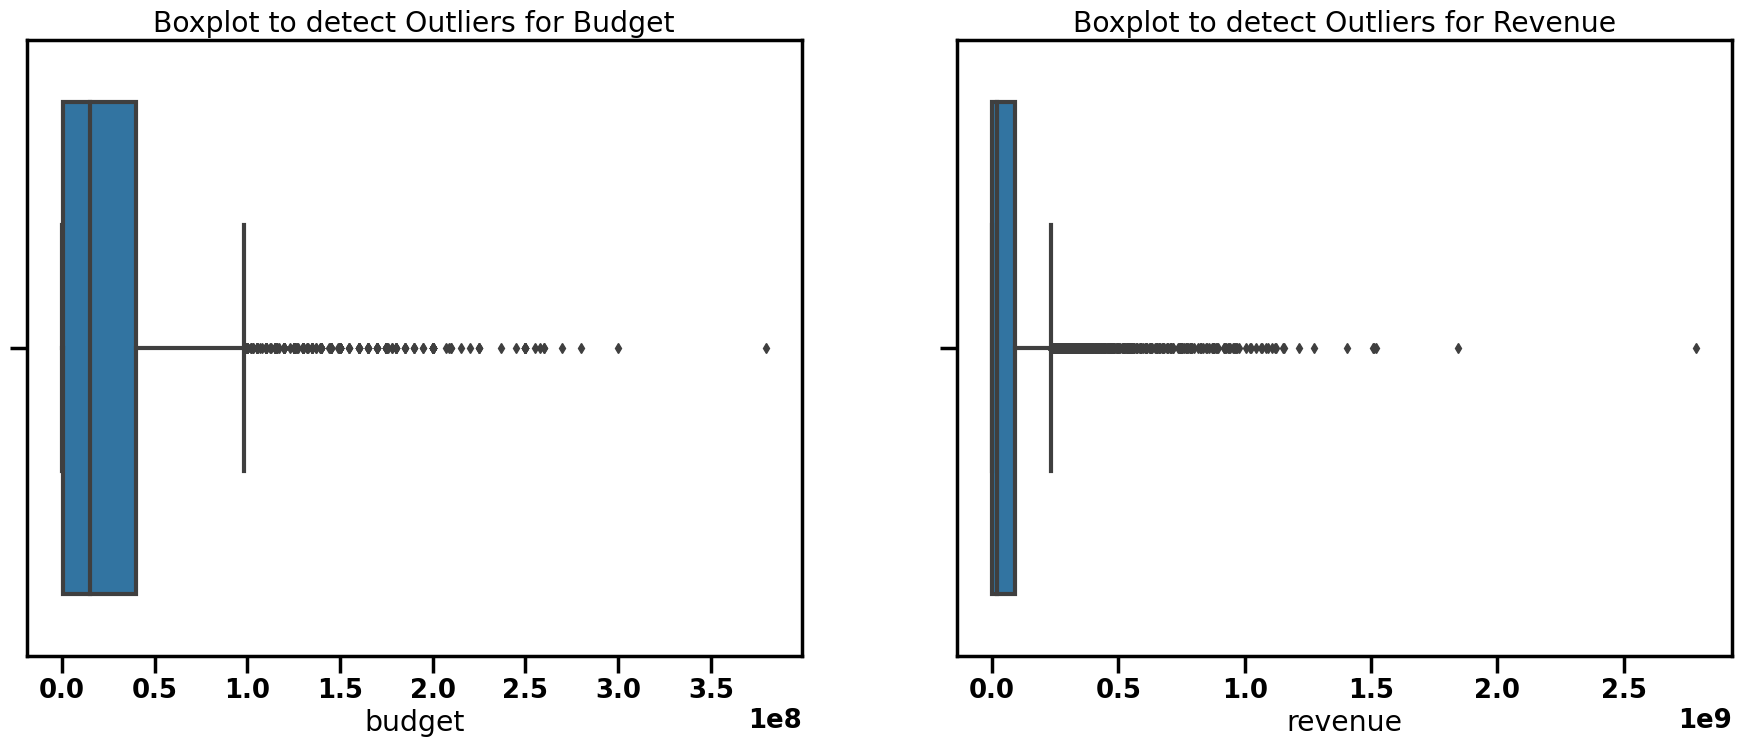

In [209]:
fig, ax = plt.subplots(1,2,figsize=(22,8))

sns.boxplot(x=movies_df2['budget'], ax=ax[0])
sns.boxplot(x=movies_df2['revenue'], ax=ax[1])

ax[0].set_title('Boxplot to detect Outliers for Budget')
ax[1].set_title('Boxplot to detect Outliers for Revenue')

plt.show()

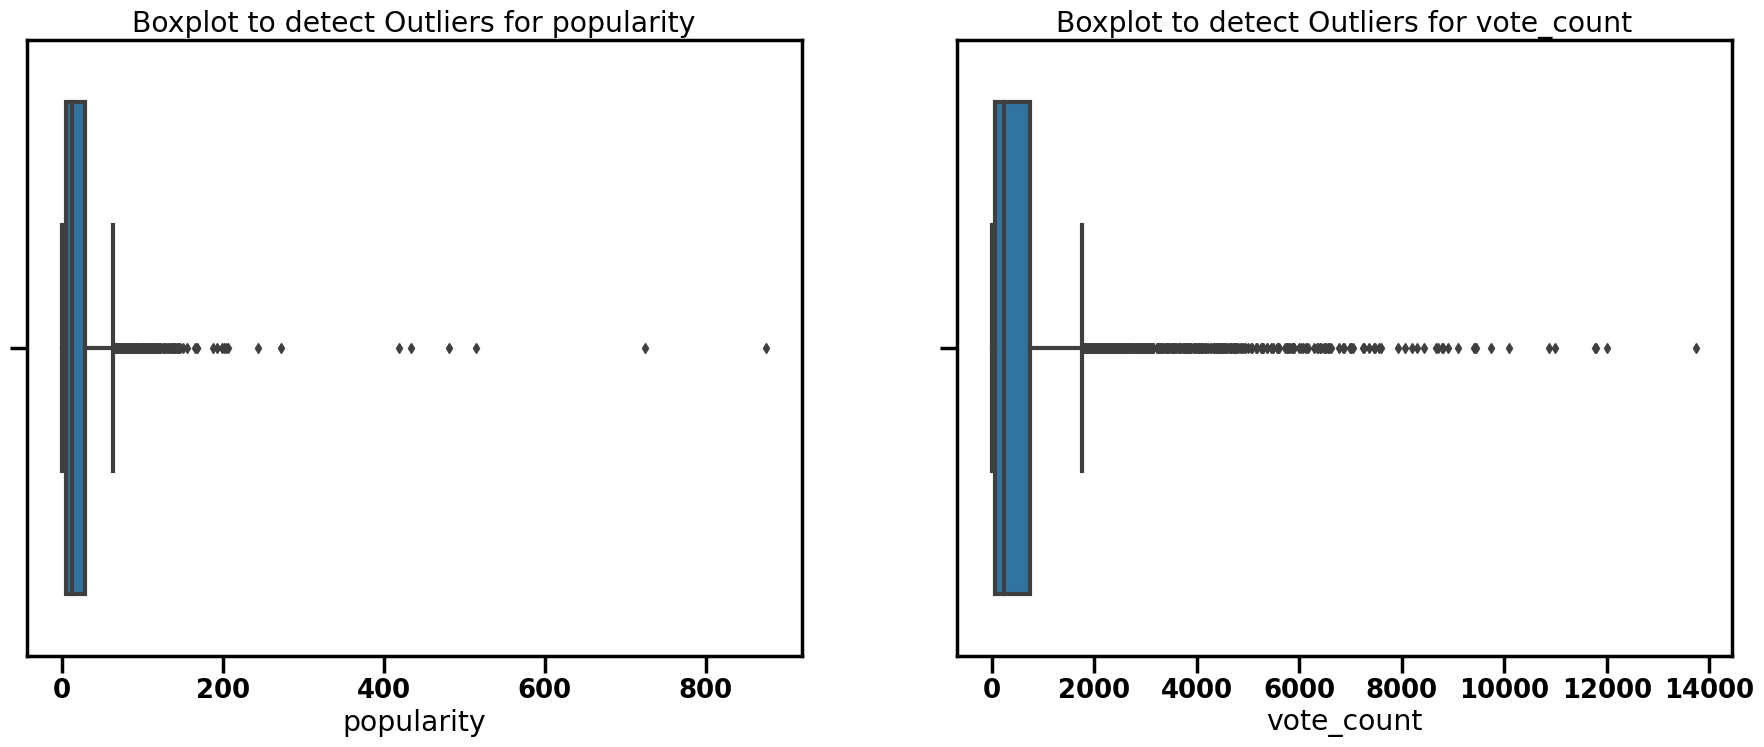

In [210]:
fig, ax = plt.subplots(1,2,figsize=(22,8))

sns.boxplot(x=movies_df2['popularity'], ax=ax[0])
sns.boxplot(x=movies_df2['vote_count'], ax=ax[1])

ax[0].set_title('Boxplot to detect Outliers for popularity')
ax[1].set_title('Boxplot to detect Outliers for vote_count')

plt.show()

In [211]:
pairplot_columns = movies_df2
pairplot_columns['profit'] = pairplot_columns['revenue'] - pairplot_columns['budget']
pairplot_columns.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,movie_id,...,crew,genre_list,company_list,countries_list,keyword_list,Year_of_Release,Month_of_Release,Century_of_Release,rating_range,profit
0,237000000,19995,150,2009-12-10,2787965087,162,Avatar,7,11800,19995,...,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",2009,12,Post-2000,7-8,2550965087
1,300000000,285,139,2007-05-19,961000000,169,Pirates of the Caribbean: At World's End,7,4500,285,...,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",2007,5,Post-2000,6-7,661000000
2,245000000,206647,107,2015-10-26,880674609,148,Spectre,6,4466,206647,...,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",2015,10,Post-2000,6-7,635674609
3,250000000,49026,112,2012-07-16,1084939099,165,The Dark Knight Rises,8,9106,49026,...,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",2012,7,Post-2000,7-8,834939099
4,260000000,49529,44,2012-03-07,284139100,132,John Carter,6,2124,49529,...,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2012,3,Post-2000,6-7,24139100


In [212]:
pairplot_columns = pairplot_columns.drop(columns = ['Month_of_Release', 'Year_of_Release', 'Century_of_Release' ,'budget','revenue', 'keyword_list' ,'company_list', 'countries_list', 'title', 'release_date', 'genre_list', 'rating_range', 'id'])
pairplot_columns.head()

,popularity,runtime,vote_average,vote_count,movie_id,cast,crew,profit
0,150,162,7,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087
1,139,169,7,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",661000000
2,107,148,6,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",635674609
3,112,165,8,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",834939099
4,44,132,6,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",24139100


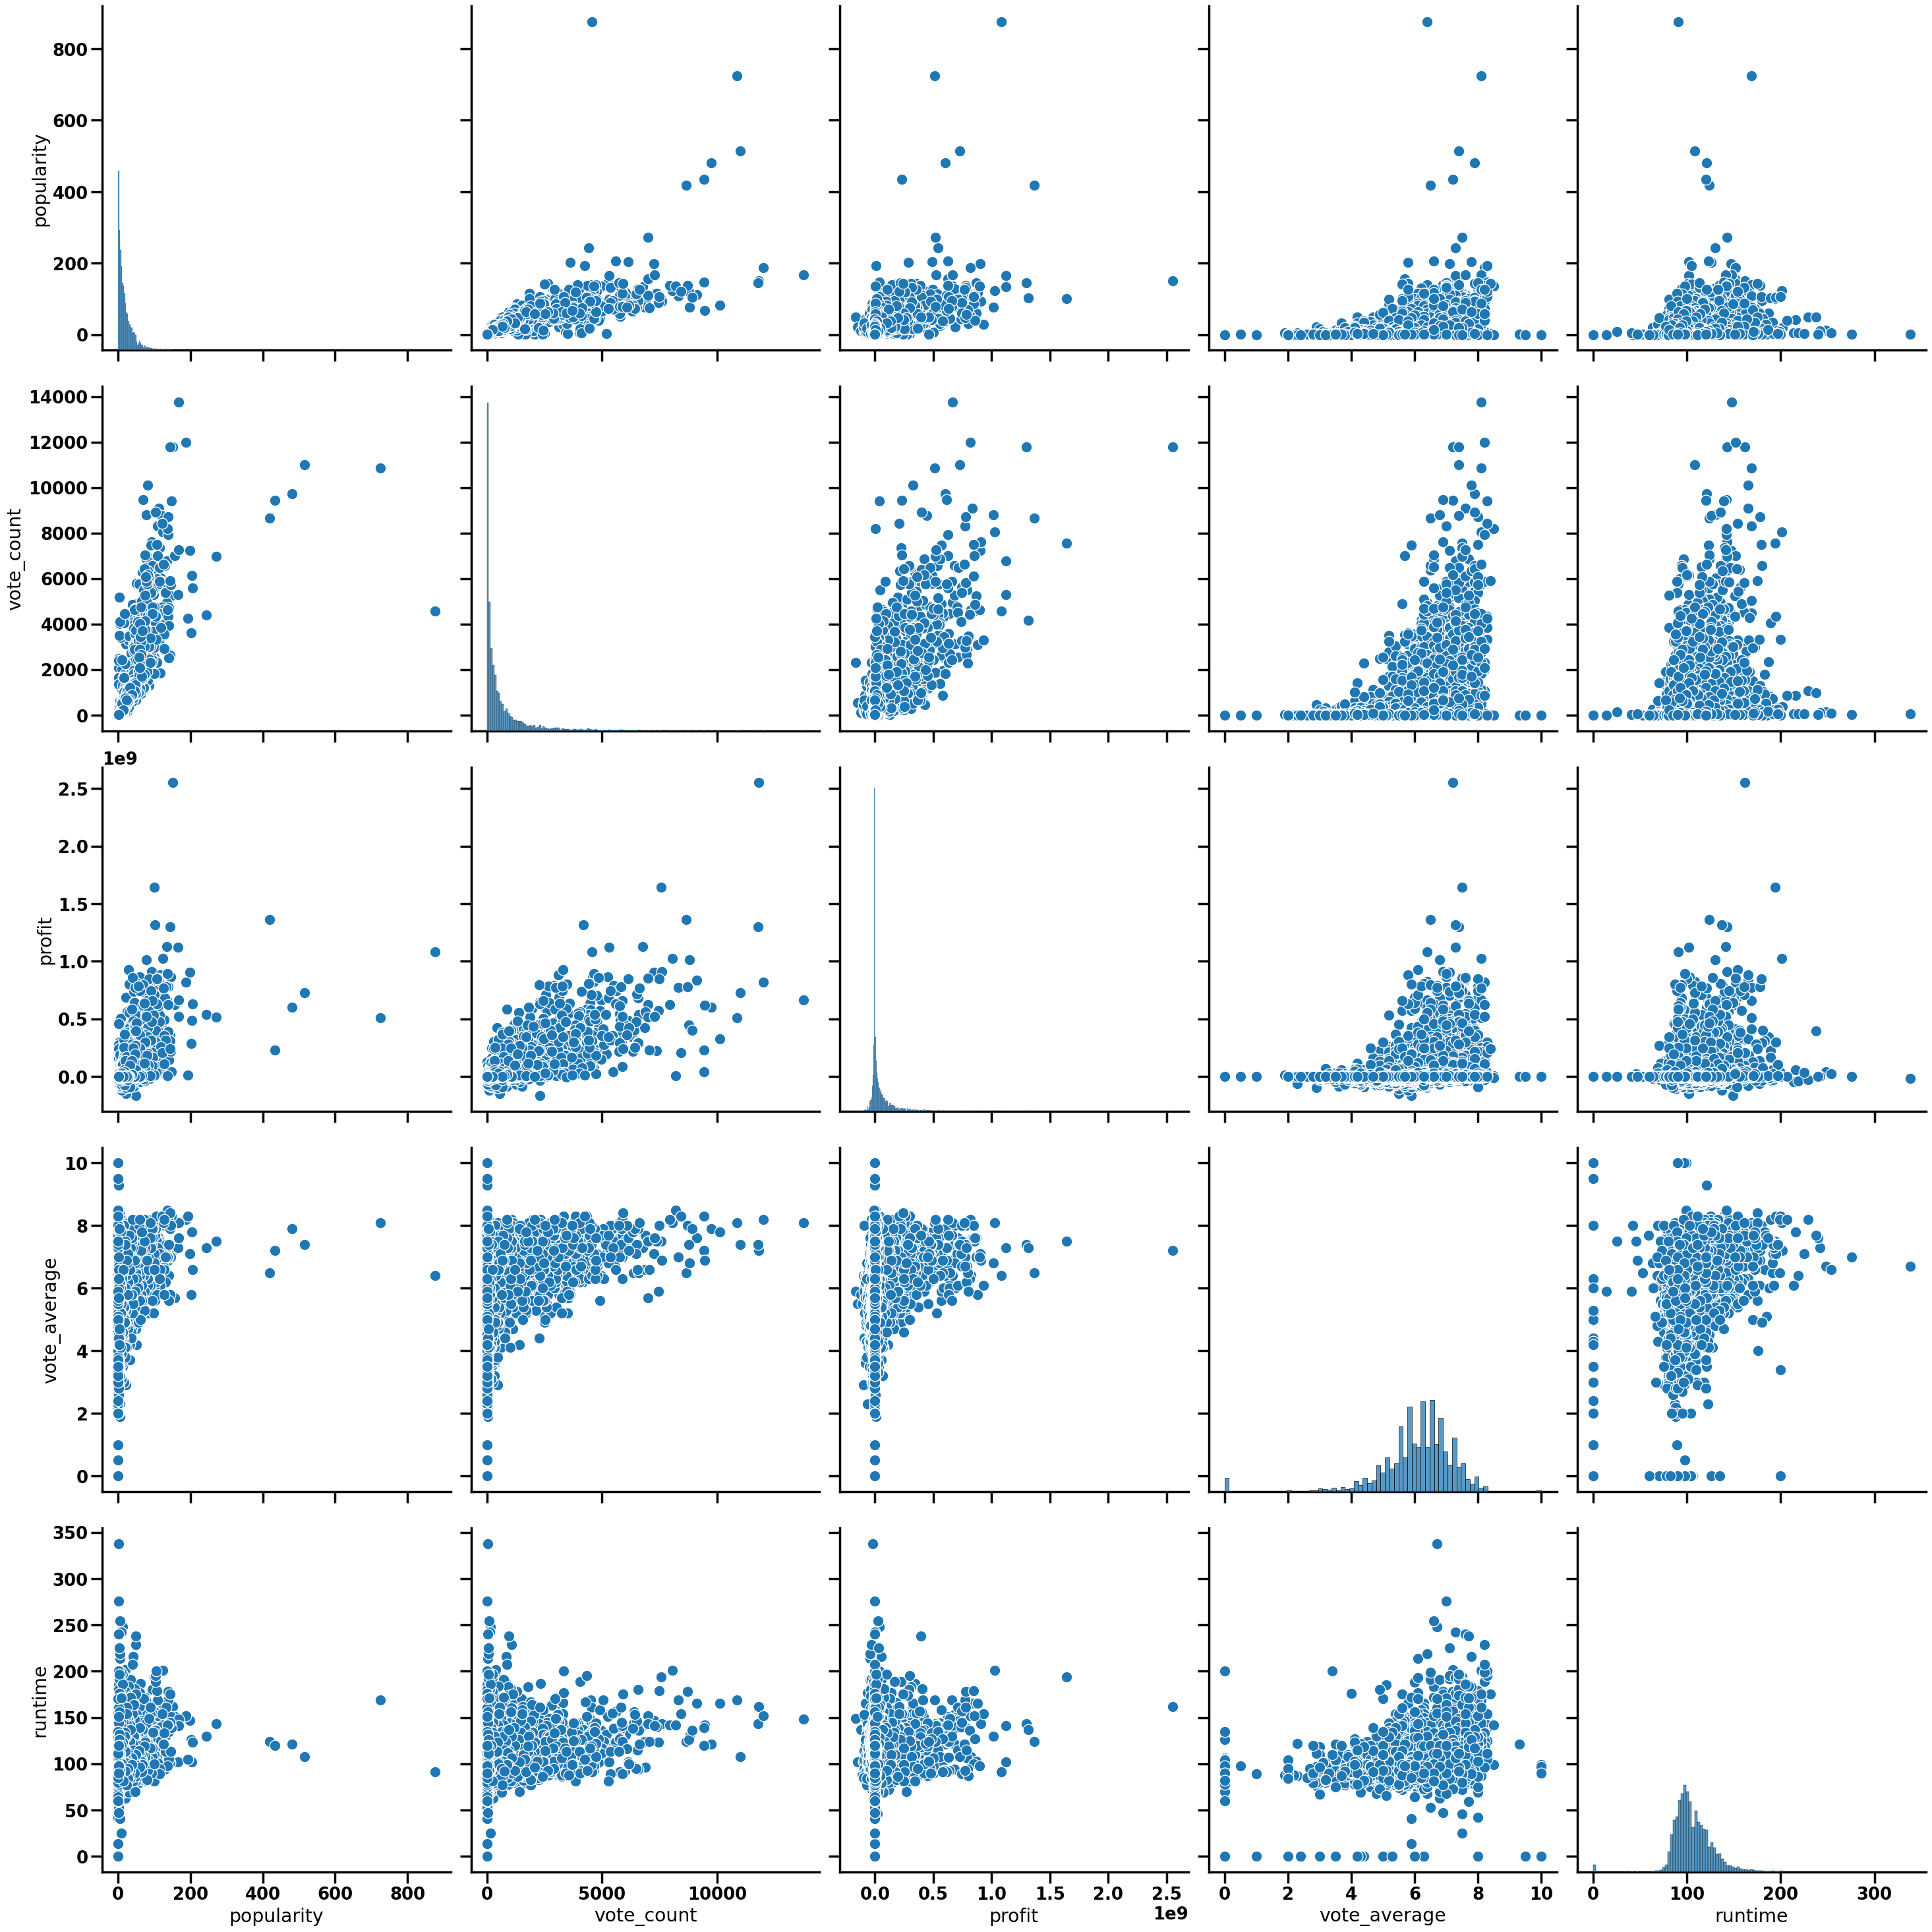

In [213]:
pairplot_columns2 = movies_df2[['popularity', 'vote_count', 'profit', 'vote_average', 'runtime']]
sns.pairplot(pairplot_columns2, height=6, aspect=1)


C:\Users\21276\AppData\Local\Temp\ipykernel_39076\2146749662.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



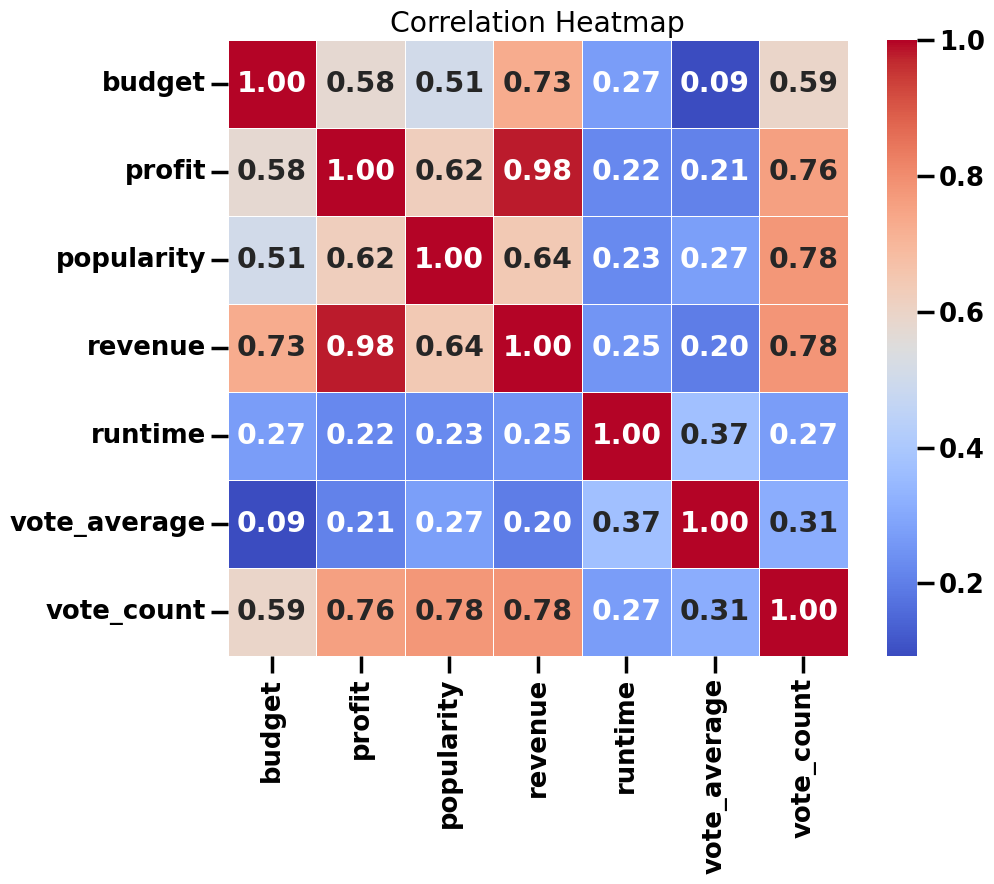

In [214]:
selected_columns = ['budget', 'profit', 'popularity', 'revenue','runtime','release_date','vote_average','vote_count']
selected_data = movies_df2[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

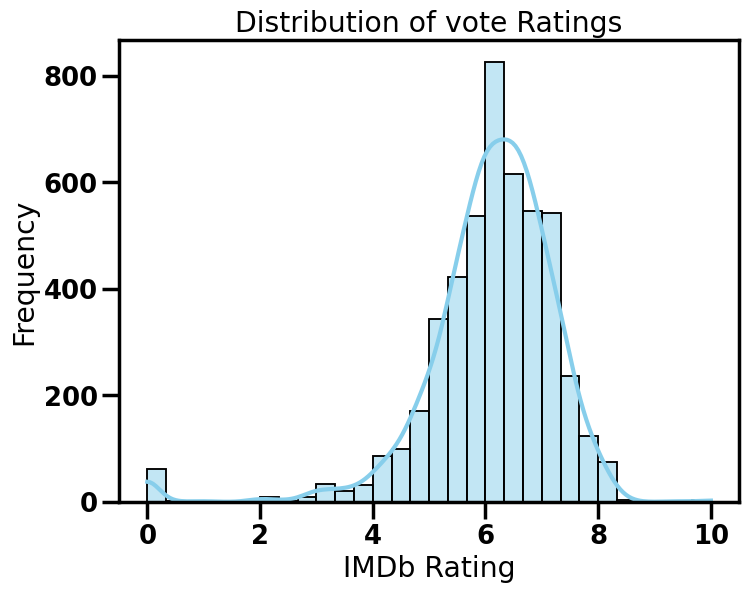

In [215]:
plt.figure(figsize=(8, 6))
sns.histplot(movies_df2['vote_average'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of vote Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

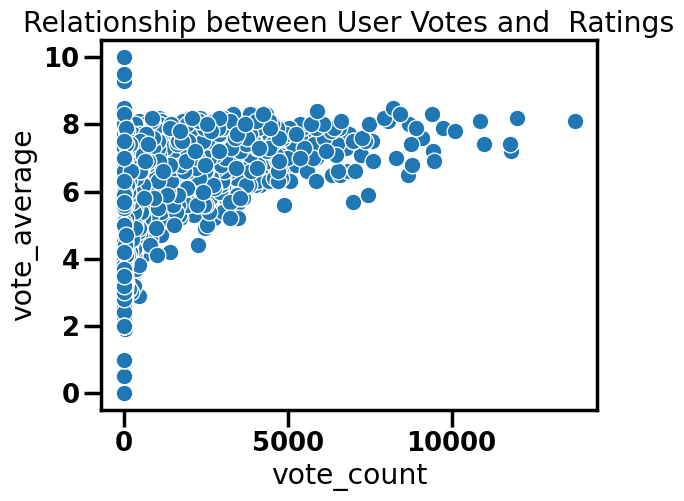

In [216]:
sns.scatterplot(x='vote_count', y='vote_average', data=movies_df2)
plt.title('Relationship between User Votes and  Ratings')
plt.show()

In [217]:
movies_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 0 to 4808
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   budget              4808 non-null   int64         
 1   id                  4808 non-null   int64         
 2   popularity          4808 non-null   float64       
 3   release_date        4808 non-null   datetime64[ns]
 4   revenue             4808 non-null   int64         
 5   runtime             4808 non-null   float64       
 6   title               4808 non-null   object        
 7   vote_average        4808 non-null   float64       
 8   vote_count          4808 non-null   int64         
 9   movie_id            4808 non-null   int64         
 10  cast                4808 non-null   object        
 11  crew                4808 non-null   object        
 12  genre_list          4808 non-null   object        
 13  company_list        4808 non-null   object      

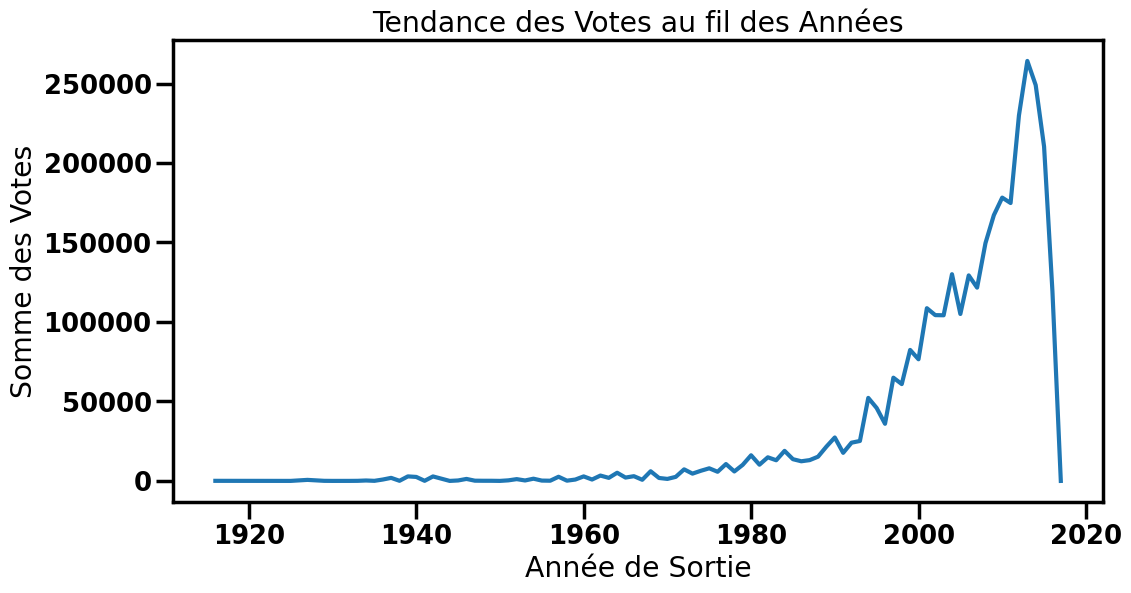

In [218]:
votes_by_year = movies_df2.groupby('Year_of_Release')['vote_count'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=votes_by_year, x='Year_of_Release', y='vote_count')
plt.title('Tendance des Votes au fil des Années')
plt.xlabel('Année de Sortie')
plt.ylabel('Somme des Votes')
plt.show()

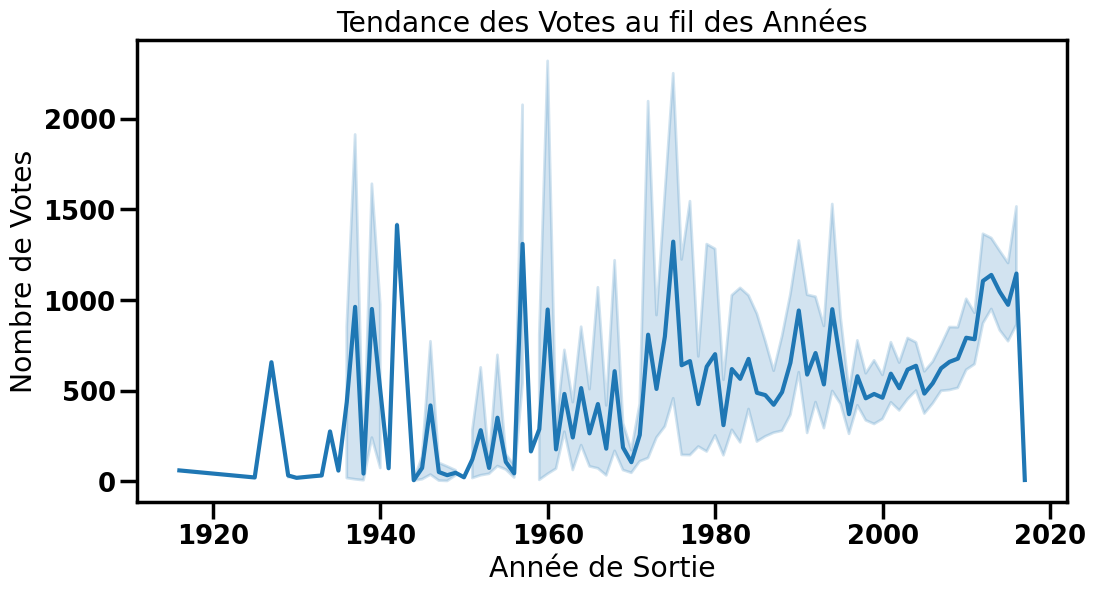

In [219]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies_df2, x='Year_of_Release', y='vote_count')
plt.title('Tendance des Votes au fil des Années')
plt.xlabel('Année de Sortie')
plt.ylabel('Nombre de Votes')
plt.show()

In [220]:
# Exploring movies which have the highest ROI 

movies_df2["ROI"] = movies_df2["revenue"]/movies_df2["budget"]

movies_df2[(movies_df2["budget"] > 1000) & (movies_df2["vote_count"] >500)].sort_values("ROI", ascending = False).head(10).reset_index()

px.line(movies_df2[(movies_df2["budget"] > 1000) & (movies_df2["vote_count"] >500)].sort_values("ROI", ascending = False).head(20).reset_index(), 
        x = "title", y = "ROI", title = "Movies with highest ROI",
        labels = {"title":"Movie Name","ROI":"ROI (USD $)"})

In [221]:

def genre_rshp(param, n):
    # We'll be only considering the Top n movies which have performed well either on the basis of revenue or ratings
    high = movies_df2[movies_df2["vote_count"] > 500].sort_values(param, ascending=False).head(n).reset_index()["genre_list"]
    
    # If genre_list contains dictionaries, extract the values from the dictionaries
    high = high.apply(lambda x: ' '.join([genre['name'] for genre in x]))
    
    # Split the strings into individual words and store them in a list
    words = []
    for row in high:
        words.extend(row.split())
    
    # Count the occurrences of each word using a dictionary
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1     
    
    # Sorting the dictionary on the basis of genre occurrences 
    sorted_dict = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))
    
    # Creating a new pandas DataFrame with first five key-value pairs and sum of last six values
    data = {'Genre': [], 'Count': []}
    other = 0
    count = 0
    for key, value in sorted_dict.items():
        if count <= 5:
            data['Genre'].append(key)
            data['Count'].append(value)
            count += 1
        else:
            other += value
    data['Genre'].append('Other')
    data['Count'].append(other)
    
    new_df = pd.DataFrame(data)
    
    fig = px.pie(new_df, values='Count', names='Genre',
                 title="Top genres related to the highest " + param)
    return fig

# Exploring the relationship of genres alongside revenue
fig2 = genre_rshp("revenue", 200)

fig2.show()


In [222]:
#Exploring the relationship of genres alongside vote avergae/ movie rating
fig3 = genre_rshp("vote_average", 200)

fig3.show()

In [223]:
#Exploring the relationship of genres alongside popularity metric
fig4 = genre_rshp("popularity", 200)

fig4.show()

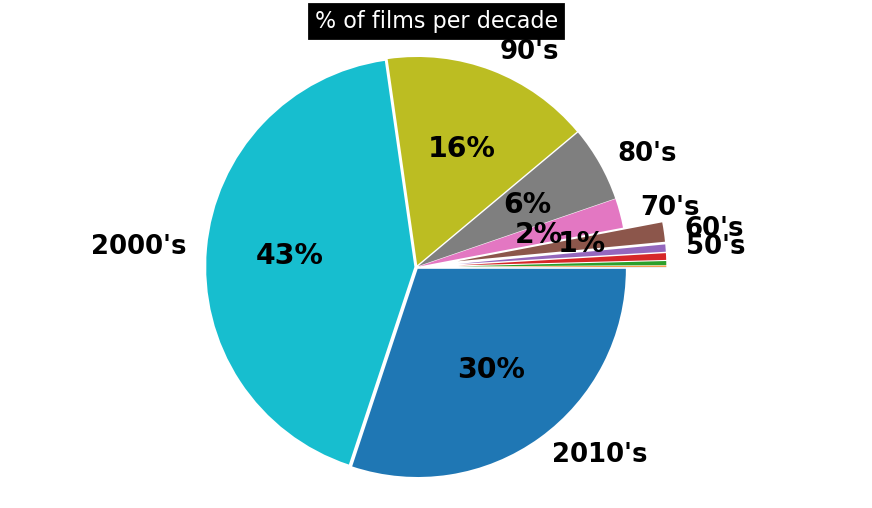

In [224]:
# Assuming movies_df2 contains information about movies with a 'release_year' column
# Calculate the decade for each movie
movies_df2['decade'] = (movies_df2['Year_of_Release'] // 10) * 10

# Count the number of movies per decade
movies_per_decade = movies_df2['decade'].value_counts().sort_index()

# Rename the index to match the labels expected in your label function
movies_per_decade.index = movies_per_decade.index - 1900

# Set the context for seaborn
sns.set_context("poster", font_scale=0.85)

# Function used to set the labels
def label(s):
    val = (1900 + s, s)[s < 100]
    chaine = '' if s < 50 else "{}'s".format(int(val))
    return chaine

# Create a figure and axis
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))

# Define labels, sizes, and explode for the pie chart
labels = [label(s) for s in movies_per_decade.index]
sizes = movies_per_decade.values
explode = [0.2 if sizes[i] < 100 else 0.01 for i in range(len(labels))]

# Plot the pie chart
ax.pie(sizes, explode=explode, labels=labels,
       autopct=lambda x: '{:1.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)

# Set equal aspect ratio
ax.axis('equal')

# Set the title
ax.set_title('% of films per decade', bbox={'facecolor': 'k', 'pad': 5}, color='w', fontsize=16)

# Show the plot
plt.show()


# modeling

In [225]:
movies_nf = movies[['movie_id','title','vote_average','overview','genres','release_date','keywords','cast','crew']]

In [226]:
movies_nf.head(3)

,movie_id,title,vote_average,overview,genres,release_date,keywords,cast,crew
0,19995,Avatar,7,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2009-12-10,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,7,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",2007-05-19,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,6,A cryptic message from Bondâs past sends him...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2015-10-26,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [227]:
movies_nf.isnull().sum()

movie_id        0
title           0
vote_average    0
overview        0
genres          0
release_date    0
keywords        0
cast            0
crew            0
dtype: int64

In [228]:
movies_nf.duplicated().sum()

0

In [229]:
#genres has a weird format let's change it 
movies_nf.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [230]:
type(movies_nf['genres'].iloc[0])

str

In [231]:
import ast
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [232]:
movies_nf['genres'] = movies_nf['genres'].apply(convert)

C:\Users\21276\AppData\Local\Temp\ipykernel_39076\3879273620.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [233]:
#same thing for keywords 
movies_nf['keywords'].iloc[0]
movies_nf['keywords'] = movies_nf['keywords'].apply(convert)
movies_nf['keywords']

C:\Users\21276\AppData\Local\Temp\ipykernel_39076\3128302934.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4804    [united states–mexico barrier, legs, arms, pap...
4805                                                   []
4806    [date, love at first sight, narration, investi...
4807                                                   []
4808            [obsession, camcorder, crush, dream girl]
Name: keywords, Length: 4808, dtype: object

In [234]:
movies_nf['genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4808, dtype: object

In [235]:
#we do the same to 'cast'
movies_nf['cast'][0]
def convert_three(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i['name'])
            counter += 1
        else:
            break
    return L

movies_nf['cast'] = movies_nf['cast'].apply(convert_three)
movies_nf['cast']

C:\Users\21276\AppData\Local\Temp\ipykernel_39076\3474999593.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4806           [Eric Mabius, Kristin Booth, Crystal Lowe]
4807            [Daniel Henney, Eliza Coupe, Bill Paxton]
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4808, dtype: object

In [236]:
#same thing for crew we only want the name of the director 
movies_nf['crew'][0]
def convert_crew(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L
movies_nf['crew'] = movies_nf['crew'].apply(convert_crew)
movies_nf['crew']

C:\Users\21276\AppData\Local\Temp\ipykernel_39076\26785006.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0                                [James Cameron]
1                               [Gore Verbinski]
2                                   [Sam Mendes]
3                            [Christopher Nolan]
4                               [Andrew Stanton]
                          ...                   
4804                          [Robert Rodriguez]
4805                              [Edward Burns]
4806                               [Scott Smith]
4807                               [Daniel Hsia]
4808    [Brian Herzlinger, Jon Gunn, Brett Winn]
Name: crew, Length: 4808, dtype: object

In [237]:
#since we want the name of the director only let's change the name from crew to director :
movies_nf.rename(columns={'crew': 'director'}, inplace=True)

C:\Users\21276\AppData\Local\Temp\ipykernel_39076\1770484271.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [238]:
movies_nf

,movie_id,title,vote_average,overview,genres,release_date,keywords,cast,director
0,19995,Avatar,7,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]",2009-12-10,"[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,7,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]",2007-05-19,"[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,6,A cryptic message from Bondâs past sends him...,"[Action, Adventure, Crime]",2015-10-26,"[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,8,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]",2012-07-16,"[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,6,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]",2012-03-07,"[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]
...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,7,El Mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]",1992-09-04,"[united states–mexico barrier, legs, arms, pap...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez]
4805,72766,Newlyweds,6,A newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]",2011-12-26,[],"[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns]
4806,231617,"Signed, Sealed, Delivered",7,"""Signed, Sealed, Delivered"" introduces a dedic...","[Comedy, Drama, Romance, TV Movie]",2013-10-13,"[date, love at first sight, narration, investi...","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith]
4807,126186,Shanghai Calling,6,When ambitious New York attorney Sam is sent t...,[],2012-05-03,[],"[Daniel Henney, Eliza Coupe, Bill Paxton]",[Daniel Hsia]


In [239]:
#rename vote average to rating : 
movies_nf.rename(columns={'vote_average': 'rating'}, inplace=True)
movies_nf

C:\Users\21276\AppData\Local\Temp\ipykernel_39076\429730147.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,movie_id,title,rating,overview,genres,release_date,keywords,cast,director
0,19995,Avatar,7,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]",2009-12-10,"[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,7,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]",2007-05-19,"[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,6,A cryptic message from Bondâs past sends him...,"[Action, Adventure, Crime]",2015-10-26,"[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,8,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]",2012-07-16,"[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,6,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]",2012-03-07,"[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]
...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,7,El Mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]",1992-09-04,"[united states–mexico barrier, legs, arms, pap...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez]
4805,72766,Newlyweds,6,A newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]",2011-12-26,[],"[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns]
4806,231617,"Signed, Sealed, Delivered",7,"""Signed, Sealed, Delivered"" introduces a dedic...","[Comedy, Drama, Romance, TV Movie]",2013-10-13,"[date, love at first sight, narration, investi...","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith]
4807,126186,Shanghai Calling,6,When ambitious New York attorney Sam is sent t...,[],2012-05-03,[],"[Daniel Henney, Eliza Coupe, Bill Paxton]",[Daniel Hsia]


In [240]:
print(type(movies_nf))
print(movies_nf.dtypes)


<class 'pandas.core.frame.DataFrame'>
movie_id                 int64
title                   object
rating                 float64
overview                object
genres                  object
release_date    datetime64[ns]
keywords                object
cast                    object
director                object
dtype: object


In [241]:
movies_nf

,movie_id,title,rating,overview,genres,release_date,keywords,cast,director
0,19995,Avatar,7,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]",2009-12-10,"[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,7,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]",2007-05-19,"[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,6,A cryptic message from Bondâs past sends him...,"[Action, Adventure, Crime]",2015-10-26,"[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,8,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]",2012-07-16,"[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,6,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]",2012-03-07,"[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]
...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,7,El Mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]",1992-09-04,"[united states–mexico barrier, legs, arms, pap...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez]
4805,72766,Newlyweds,6,A newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]",2011-12-26,[],"[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns]
4806,231617,"Signed, Sealed, Delivered",7,"""Signed, Sealed, Delivered"" introduces a dedic...","[Comedy, Drama, Romance, TV Movie]",2013-10-13,"[date, love at first sight, narration, investi...","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith]
4807,126186,Shanghai Calling,6,When ambitious New York attorney Sam is sent t...,[],2012-05-03,[],"[Daniel Henney, Eliza Coupe, Bill Paxton]",[Daniel Hsia]


In [242]:
movies_nf['overview'] = movies_nf['overview'].str.lower().replace('[^\w\s]','')
movies_nf

C:\Users\21276\AppData\Local\Temp\ipykernel_39076\2910098927.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,movie_id,title,rating,overview,genres,release_date,keywords,cast,director
0,19995,Avatar,7,"in the 22nd century, a paraplegic marine is di...","[Action, Adventure, Fantasy, Science Fiction]",2009-12-10,"[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,7,"captain barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]",2007-05-19,"[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,6,a cryptic message from bondâs past sends him...,"[Action, Adventure, Crime]",2015-10-26,"[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,8,following the death of district attorney harve...,"[Action, Crime, Drama, Thriller]",2012-07-16,"[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,6,"john carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]",2012-03-07,"[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]
...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,7,el mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]",1992-09-04,"[united states–mexico barrier, legs, arms, pap...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez]
4805,72766,Newlyweds,6,a newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]",2011-12-26,[],"[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns]
4806,231617,"Signed, Sealed, Delivered",7,"""signed, sealed, delivered"" introduces a dedic...","[Comedy, Drama, Romance, TV Movie]",2013-10-13,"[date, love at first sight, narration, investi...","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith]
4807,126186,Shanghai Calling,6,when ambitious new york attorney sam is sent t...,[],2012-05-03,[],"[Daniel Henney, Eliza Coupe, Bill Paxton]",[Daniel Hsia]


In [244]:
movies_nf

,movie_id,title,rating,overview,genres,release_date,keywords,cast,director
0,19995,Avatar,7,"in the 22nd century, a paraplegic marine is di...","[Action, Adventure, Fantasy, Science Fiction]",2009-12-10,"[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,7,"captain barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]",2007-05-19,"[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,6,a cryptic message from bondâs past sends him...,"[Action, Adventure, Crime]",2015-10-26,"[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,8,following the death of district attorney harve...,"[Action, Crime, Drama, Thriller]",2012-07-16,"[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,6,"john carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]",2012-03-07,"[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]
...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,7,el mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]",1992-09-04,"[united states–mexico barrier, legs, arms, pap...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez]
4805,72766,Newlyweds,6,a newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]",2011-12-26,[],"[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns]
4806,231617,"Signed, Sealed, Delivered",7,"""signed, sealed, delivered"" introduces a dedic...","[Comedy, Drama, Romance, TV Movie]",2013-10-13,"[date, love at first sight, narration, investi...","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith]
4807,126186,Shanghai Calling,6,when ambitious new york attorney sam is sent t...,[],2012-05-03,[],"[Daniel Henney, Eliza Coupe, Bill Paxton]",[Daniel Hsia]


In [245]:
movies_nf

,movie_id,title,rating,overview,genres,release_date,keywords,cast,director
0,19995,Avatar,7,"in the 22nd century, a paraplegic marine is di...","[Action, Adventure, Fantasy, Science Fiction]",2009-12-10,"[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,7,"captain barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]",2007-05-19,"[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,6,a cryptic message from bondâs past sends him...,"[Action, Adventure, Crime]",2015-10-26,"[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,8,following the death of district attorney harve...,"[Action, Crime, Drama, Thriller]",2012-07-16,"[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,6,"john carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]",2012-03-07,"[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]
...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,7,el mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]",1992-09-04,"[united states–mexico barrier, legs, arms, pap...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez]
4805,72766,Newlyweds,6,a newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]",2011-12-26,[],"[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns]
4806,231617,"Signed, Sealed, Delivered",7,"""signed, sealed, delivered"" introduces a dedic...","[Comedy, Drama, Romance, TV Movie]",2013-10-13,"[date, love at first sight, narration, investi...","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith]
4807,126186,Shanghai Calling,6,when ambitious new york attorney sam is sent t...,[],2012-05-03,[],"[Daniel Henney, Eliza Coupe, Bill Paxton]",[Daniel Hsia]


In [246]:
# Define a function to concatenate elements of a list into a single string separated by spaces
def concatenate_strings(lst):
    if isinstance(lst, list):
        return ' '.join(concatenate_strings(item) for item in lst)
    elif isinstance(lst, str):
        return lst
    else:
        return str(lst)

# Get the list of columns excluding 'movie_id', 'release_date', and 'overview'
columns_to_concatenate = [col for col in movies_nf.columns if col not in ['movie_id', 'release_date', 'overview']]

# Apply the function to selected columns in the DataFrame and store the result in the 'comb' column
movies_nf['comb'] = movies_nf[columns_to_concatenate].apply(lambda row: concatenate_strings(row.tolist()), axis=1)

# Display the DataFrame
print(movies_nf)



      movie_id                                     title  rating  \
0        19995                                    Avatar       7   
1          285  Pirates of the Caribbean: At World's End       7   
2       206647                                   Spectre       6   
3        49026                     The Dark Knight Rises       8   
4        49529                               John Carter       6   
...        ...                                       ...     ...   
4804      9367                               El Mariachi       7   
4805     72766                                 Newlyweds       6   
4806    231617                 Signed, Sealed, Delivered       7   
4807    126186                          Shanghai Calling       6   
4808     25975                         My Date with Drew       6   

                                               overview  \
0     in the 22nd century, a paraplegic marine is di...   
1     captain barbossa, long believed to be dead, ha...   
2     

C:\Users\21276\AppData\Local\Temp\ipykernel_39076\247653859.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import pandas as pd
file_path = 'data_autre3.csv'  
movies_nf.to_csv(file_path, index=False)

print("DataFrame saved to CSV successfully in the specified directory.")


DataFrame saved to CSV successfully in the specified directory.
